In [1]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import sys

#KYW inst
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


In [2]:
sd.play(data, fs)

In [40]:
#Allpass equation = Y(n) = a1*x(n) + x(n-1) - a1*y(n-1)

fc = 1000  #Center Frequency

# a1 coefficient for allpass equation
a1 = (np.tan(np.pi * fc/fs) - 1)/(np.tan(np.pi * fc/fs) + 1)

speed = 8 #speed of LFO in Hz

amplitude = 1

# Determines how far apart allpass cutoff frequencies are from each other
intensity = 3
if(intensity == 1):
    variance = 250
elif(intensity == 2):
    variance = 500
elif(intensity == 3):
    variance = 750
elif(intensity == 4):
    variance = 1000


y_1_1 = 0
y_1 = 0
y_2_1 = 0
y_2 = 0
y_3_1 = 0
y_3 = 0
y_4_1 = 0
y_4 = 0
y_5_1 = 0
y_5 = 0
y_6_1 = 0
y_6 = 0
y_7_1 = 0
y_7 = 0
y_8_1 = 0
y_8 = 0

In [41]:
output = np.zeros((len(data), 2))
for i in range(1,len(data)):

    #Calculate LFO value for this sample
    t = i/fs
    lfo_val = amplitude * np.sin(2 * np.pi * speed * t)


    #APF 1
    a1_1 = (np.tan(np.pi * (fc + (lfo_val * variance))/fs)-1) / (np.tan(np.pi * (fc + (lfo_val * variance))/fs) + 1)
    y_1_1= y_1
    y_1 = (a1_1 * data[i]) + data[i-1] - (a1_1 * y_1_1)

    #APF 2
    a1_2 = (np.tan(np.pi * ((fc + variance) + (lfo_val * variance))/fs)-1) / (np.tan(np.pi * ((fc + variance) + (lfo_val * variance))/fs) + 1)
    y_2_1 = y_2
    y_2 = (a1_2 * y_1) + y_1_1 - (a1_2 * y_2_1)

    #APF 3
    a1_3 = (np.tan(np.pi * ((fc + (variance*2)) + (lfo_val * variance))/fs)-1) / (np.tan(np.pi * ((fc + (variance*2)) + (lfo_val * variance))/fs) + 1)
    y_3_1 = y_3
    y_3 = (a1_3 * y_2) + y_2_1 - (a1_3 * y_3_1)

    #APF 4
    a1_4 = (np.tan(np.pi * ((fc + (variance*3)) + (lfo_val * variance))/fs)-1) / (np.tan(np.pi * ((fc + (variance*3)) + (lfo_val * variance))/fs) + 1)
    y_4_1 = y_4
    y_4 = (a1_4 * y_3) + y_3_1 - (a1_4 * y_4_1)

    #APF 5
    a1_5 = (np.tan(np.pi * ((fc + (variance*4)) + (lfo_val * variance))/fs)-1) / (np.tan(np.pi * ((fc + (variance*4)) + (lfo_val * variance))/fs) + 1)
    y_5_1 = y_5
    y_5 = (a1_5 * y_4) + y_4_1 - (a1_5 * y_5_1)

    #APF 6
    a1_6 = (np.tan(np.pi * ((fc + (variance*5)) + (lfo_val * variance))/fs)-1) / (np.tan(np.pi * ((fc + (variance*5)) + (lfo_val * variance))/fs) + 1)
    y_6_1 = y_6
    y_6 = (a1_6 * y_5) + y_5_1 - (a1_6 * y_6_1)

    #APF 7
    a1_7 = (np.tan(np.pi * ((fc + (variance*6)) + (lfo_val * variance))/fs)-1) / (np.tan(np.pi * ((fc + (variance*6)) + (lfo_val * variance))/fs) + 1)
    y_7_1 = y_7
    y_7 = (a1_7 * y_6) + y_6_1 - (a1_7 * y_7_1)

    #APF 8
    a1_8 = (np.tan(np.pi * ((fc + (variance*7)) + (lfo_val * variance))/fs)-1) / (np.tan(np.pi * ((fc + (variance*7)) + (lfo_val * variance))/fs) + 1)
    y_8_1 = y_8
    y_8 = (a1_8 * y_7) + y_7_1 - (a1_8 * y_7_1)

    output[i] = y_8


In [42]:
sd.play(output, fs)

(array([[1.68834353e-02, 1.14398778e-01, 2.66326612e-02, ...,
         1.78281032e+00, 1.41919469e+00, 2.10839673e-01],
        [8.12207185e-02, 1.28966785e-01, 8.61390425e-01, ...,
         7.06925021e+00, 6.82472743e+00, 4.19511707e+00],
        [9.57502885e-02, 2.75035298e-02, 4.32487153e-01, ...,
         4.16542071e+00, 3.07011853e+00, 2.70381972e+00],
        ...,
        [1.11992414e-09, 1.06481461e-09, 1.94541651e-10, ...,
         1.34197531e-11, 6.71354921e-12, 7.64935620e-11],
        [1.96659045e-09, 1.46848965e-09, 3.12345677e-10, ...,
         1.85197056e-11, 8.89284596e-11, 2.09415292e-11],
        [2.12967182e-10, 9.73378893e-10, 1.57780816e-10, ...,
         2.40519482e-13, 8.62126515e-11, 9.81041337e-12]]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.1484375, 0.15625  , 0.

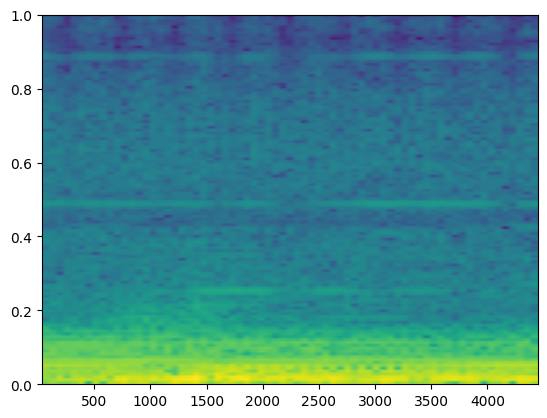

In [23]:
plt.specgram(data[1000:10000, 1])

(array([[5.36899563e-03, 9.47937013e-03, 7.91637151e-02, ...,
         9.35612415e-01, 1.79498415e+00, 8.69311164e-03],
        [2.60137030e-02, 1.48412687e-01, 5.70714194e-01, ...,
         6.11677690e+00, 7.43886268e+00, 3.66963210e+00],
        [5.36642734e-02, 1.05815276e-01, 2.35150724e-01, ...,
         3.21256681e+00, 3.47718622e+00, 3.15593089e+00],
        ...,
        [1.17946491e-09, 1.09808769e-09, 1.97027945e-10, ...,
         1.62284948e-11, 7.18134107e-12, 7.74572351e-11],
        [1.99304375e-09, 1.49695001e-09, 3.19299474e-10, ...,
         1.68163078e-11, 9.01232572e-11, 2.24793361e-11],
        [1.98053480e-10, 9.62400747e-10, 1.65363545e-10, ...,
         4.00153240e-13, 8.52133119e-11, 9.28046103e-12]]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.1484375, 0.15625  , 0.

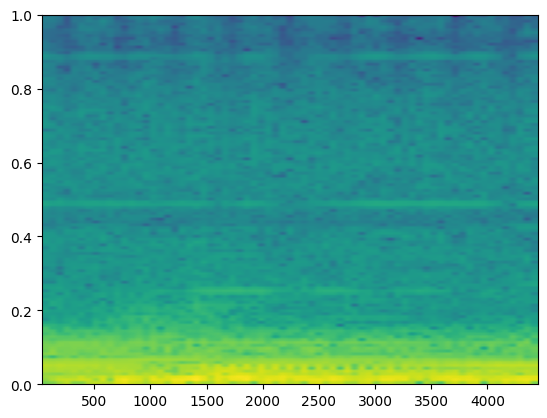

In [24]:
plt.specgram(output[1000:10000,1])